# Telecom_customer_churn

Description:Customer churn is when a company’s customers stop doing business with that company.Businesses are very keen on 
measuring churn because keeping an existing customer is far less expensive than acquiring a new customer.
New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers.
Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent 
attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build 
churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on
that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, 
as the barriers to entry for switching services are so low.

Dataset contains the classes dependent variable is "Churn" inpdendet variables are give below 

Feature variable :
    
    customerID,
    gender,
    SeniorCitizen,
    Partner,
    Dependents 
    tenure
    PhoneService
    MultipleLines
    InternetService
    OnlineSecurity
    OnlineBackup
    DeviceProtection
    TechSupport
    StreamingTV
    StreamingMovies
    Contract
    PaperlessBilling
    PaymentMethod
    MonthlyCharges
    TotalCharges




In [1]:
#importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading the data set
df= pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Observation: Target variable in the dataset is Churn , remaining all feature variables 

In [3]:
df.shape

(7043, 21)

Observation: Dataset contains the 7043 Rows and 21 columns

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observation:
1. dataset contains interger float and object data types 
2.  18 variables conatins object data type 2 intger data types and 1 float dataypes

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation: There is no null values in data set 

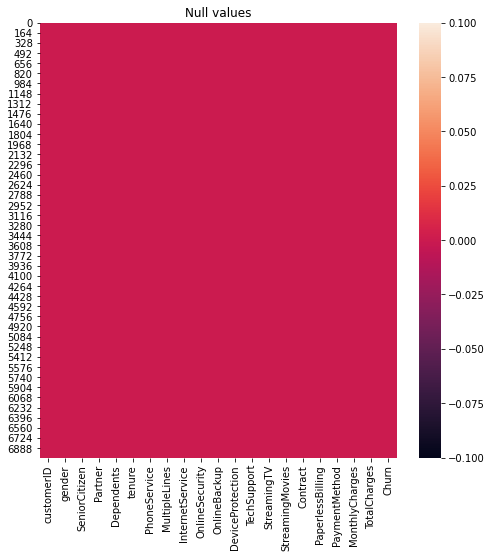

In [6]:
#Heat map to check the null values
plt.figure(figsize=[8,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: there is no null values in the data

No     5174
Yes    1869
Name: Churn, dtype: int64


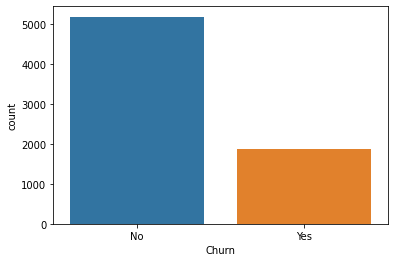

In [7]:
#to check the classification in target variable
#univariate analysis
sns.countplot(df['Churn'])
print(df['Churn'].value_counts())
plt.show()

Observation: Target variables Churn "No" poupulation is "5174", "yes" poupulation is "1869" data is imblanced 

Male      3555
Female    3488
Name: gender, dtype: int64


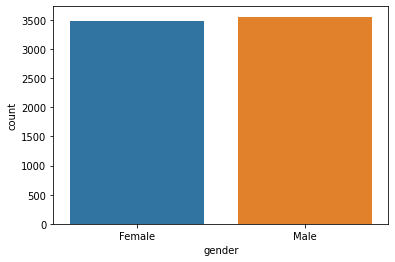

In [8]:
sns.countplot(df['gender'])
print(df['gender'].value_counts())
plt.show()

Observation: Male and female population is almost same  there is no much imblance 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


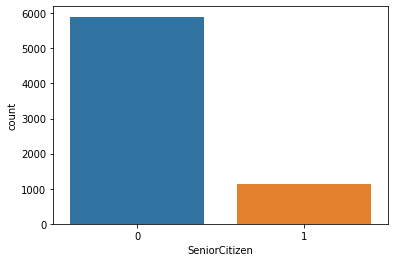

In [9]:
sns.countplot(df['SeniorCitizen'])
print(df['SeniorCitizen'].value_counts())
plt.show()


Observation: Population of the senior citizen is less compare to young people

No     3641
Yes    3402
Name: Partner, dtype: int64


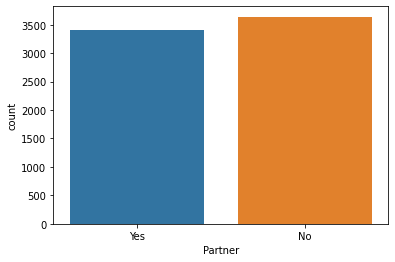

In [10]:
sns.countplot(df['Partner'])
print(df['Partner'].value_counts())
plt.show()


Observation: Patner and no patner data is balanced there is no much diffreance 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


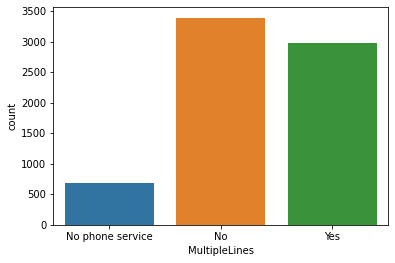

In [11]:
sns.countplot(df['MultipleLines'])
print(df['MultipleLines'].value_counts())
plt.show()


Observation: dataset have the No Multiplelines more population 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


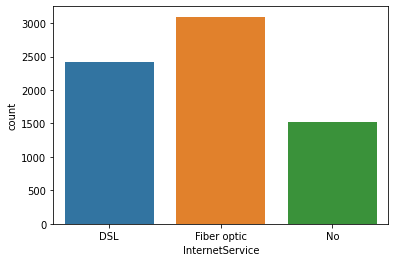

In [12]:
sns.countplot(df['InternetService'])
print(df['InternetService'].value_counts())
plt.show()


Observation: Highest number people have have Fiber optic internet service 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


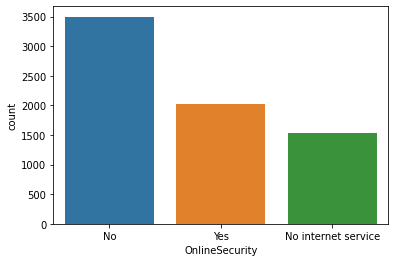

In [13]:
sns.countplot(df['OnlineSecurity'])
print(df['OnlineSecurity'].value_counts())
plt.show()


Observation: Higest number of people not have  internet security

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


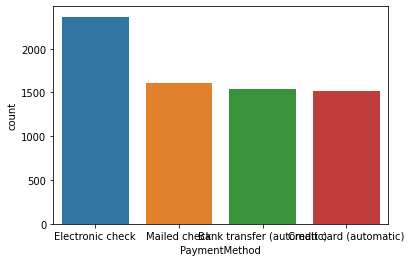

In [14]:
sns.countplot(df['PaymentMethod'])
print(df['PaymentMethod'].value_counts())
plt.show()


Observation: Most of the custmer do payment method  is electronic check  and list is credit card

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


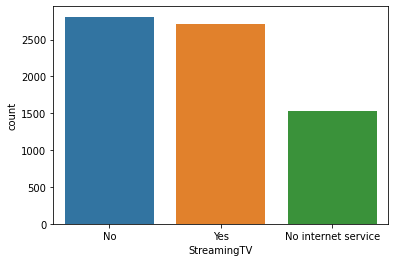

In [15]:
sns.countplot(df['StreamingTV'])
print(df['StreamingTV'].value_counts())
plt.show()


In [16]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0).astype(np.int64)

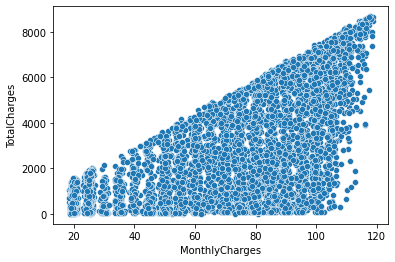

In [17]:
sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'])

In [18]:
#Selecting the object data types 

objDf = df.select_dtypes(include=['object']).copy()
objDf.head(1)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No


In [19]:
#Encoding the categorical vaiables using Label encoder

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['customerID'] = le.fit_transform(df['customerID'])
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])

df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])

df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])


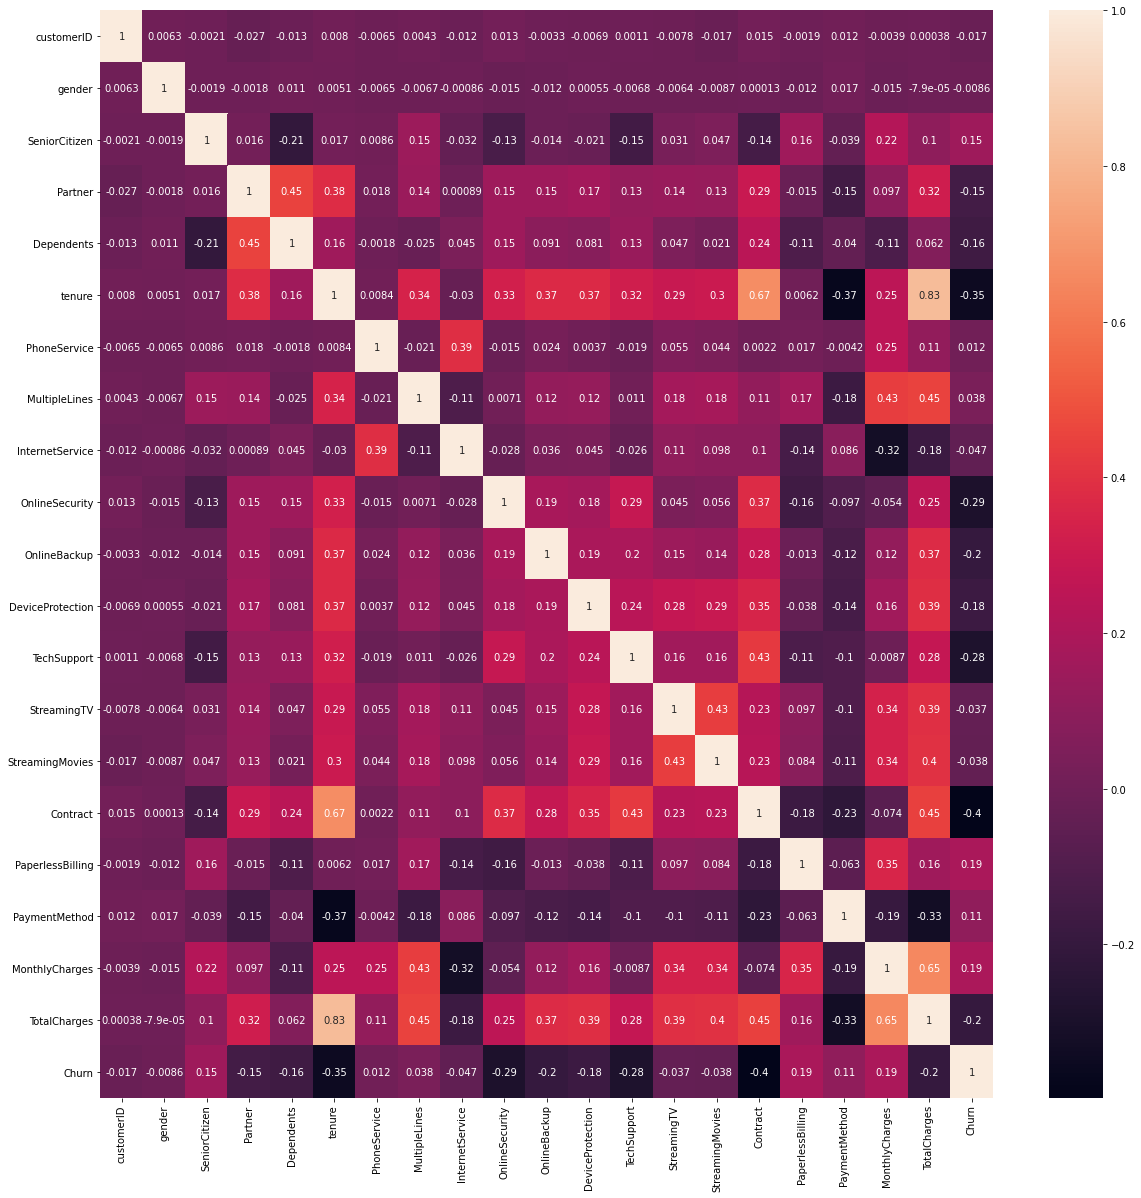

In [20]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation :
1.We clearly see that Churn have positive relation with monthly chrages and paperlessBilling, siner citizen 
2.Tenur and contact  have postive realtion 67% and contract and techsupport have positive relaltion 
3. 

In [21]:
#to display the corealtion with the target variables 
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending = False)


Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198326
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Observation:
1. Target variable Churn have positive relation with only six variables 
2. 12 independent variabless have negative relation with  target variable Churn

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

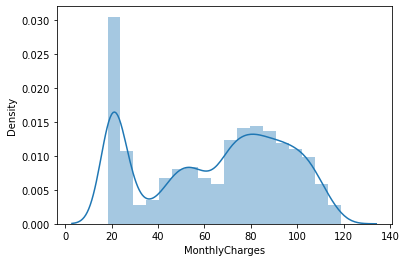

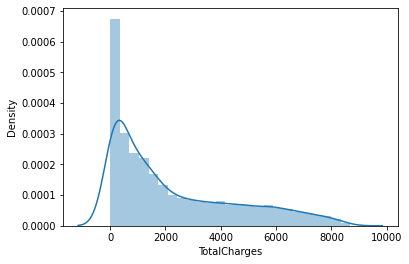

In [23]:
columns =['MonthlyCharges','TotalCharges']

for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

observation: We clearly see that data is not normly distributed suddenly skwed 

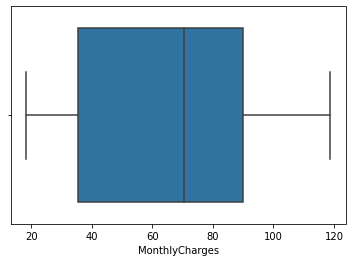

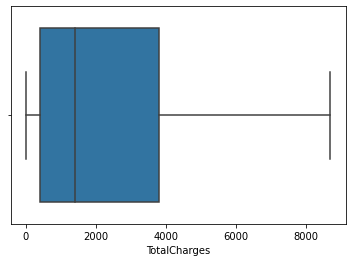

In [24]:
# with the help of box plot checking the outliers in data set 

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Observation: there is no outerliers in the dataset 

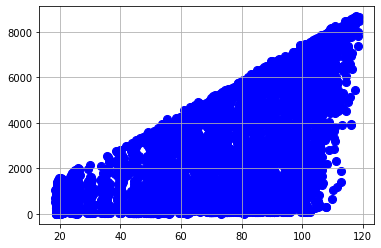

In [25]:
# plot data points
plt.scatter(df["MonthlyCharges"] ,df["TotalCharges"],  color = "b", s = 65)
plt.grid()

Observation: We clearly see that as monthly charges increase total amount also increasing 

In [26]:
#Spliting the data into x and y set
x =df.drop(['Churn'],axis=1)
y=df['Churn']

In [27]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [28]:
#checking the sahpe of the training dataset
print(x_train.shape, y_train.shape)

(5282, 20) (5282,)


In [29]:
#import library
from collections import Counter
from imblearn.over_sampling import SMOTE
counter =Counter(y_train)
print('Before', counter)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x_train, y_train)

counter =Counter(y_smote)
print('after', counter)

Before Counter({0: 3879, 1: 1403})
after Counter({0: 3879, 1: 3879})


In [30]:
## decision Tree model 

In [31]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
#dt.fit(x_smote,y_smote)   #over sampled data using here
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print("We getting DecisionTree Model accuracy rate is ",accuracy_score(y_test,p))


We getting DecisionTree Model accuracy rate is  0.7149346961953436


logistic regression 

In [32]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
#lg.fit(x_smote,y_smote)   #minority class balanced data 
Model= lg.fit(x_train,y_train)
pred =lg.predict(x_test)
#print(pred)
print("We getting logistic regression Model accuracy rate is ",accuracy_score(y_test,pred))



We getting logistic regression Model accuracy rate is  0.7904599659284497


In [33]:
#AUC ROC CURVE

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [34]:
y_pred_prob =lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.03870358, 0.68608754, 0.42301972, ..., 0.71364543, 0.44135305,
       0.63713389])

In [35]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)

In [36]:
tpr

array([0.        , 0.00214592, 0.027897  , 0.027897  , 0.03862661,
       0.03862661, 0.04291845, 0.04291845, 0.05579399, 0.05579399,
       0.06008584, 0.06008584, 0.06223176, 0.06223176, 0.06866953,
       0.06866953, 0.07296137, 0.07296137, 0.0944206 , 0.0944206 ,
       0.10515021, 0.10515021, 0.11802575, 0.11802575, 0.12017167,
       0.12017167, 0.1223176 , 0.1223176 , 0.13733906, 0.13733906,
       0.14806867, 0.14806867, 0.15665236, 0.15665236, 0.1695279 ,
       0.1695279 , 0.17381974, 0.17381974, 0.17596567, 0.17596567,
       0.17811159, 0.17811159, 0.18454936, 0.18454936, 0.19742489,
       0.19742489, 0.20386266, 0.20386266, 0.20600858, 0.20600858,
       0.21888412, 0.21888412, 0.22532189, 0.22532189, 0.22961373,
       0.22961373, 0.23175966, 0.23175966, 0.2360515 , 0.2360515 ,
       0.23819742, 0.23819742, 0.24248927, 0.24248927, 0.24678112,
       0.24678112, 0.24892704, 0.24892704, 0.25536481, 0.25536481,
       0.26824034, 0.26824034, 0.27038627, 0.27038627, 0.27253

In [37]:
thresholds

array([1.86239556e+00, 8.62395559e-01, 7.83085645e-01, 7.81625914e-01,
       7.75260949e-01, 7.74935756e-01, 7.74617721e-01, 7.74568967e-01,
       7.69761054e-01, 7.68909876e-01, 7.67788366e-01, 7.65888459e-01,
       7.63728194e-01, 7.63144634e-01, 7.60117095e-01, 7.58985391e-01,
       7.55481025e-01, 7.55367081e-01, 7.43369083e-01, 7.41097991e-01,
       7.35954023e-01, 7.35476762e-01, 7.26234206e-01, 7.24299536e-01,
       7.22865330e-01, 7.20745957e-01, 7.19753882e-01, 7.18466273e-01,
       7.13365687e-01, 7.12953920e-01, 7.12272605e-01, 7.10861798e-01,
       7.08793577e-01, 7.05330599e-01, 7.03244957e-01, 7.03053633e-01,
       7.00400982e-01, 6.98829706e-01, 6.98424296e-01, 6.97582872e-01,
       6.97404930e-01, 6.96881527e-01, 6.93735819e-01, 6.93495876e-01,
       6.87389030e-01, 6.87292472e-01, 6.86087537e-01, 6.84189472e-01,
       6.83796407e-01, 6.83474995e-01, 6.80928891e-01, 6.80114132e-01,
       6.79393178e-01, 6.78989696e-01, 6.78112168e-01, 6.77819933e-01,
      

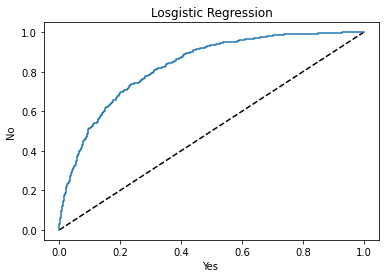

In [38]:

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Yes ')
plt.ylabel('No ')
plt.title('Losgistic Regression')
plt.show()


In [39]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [40]:
print("We Getting the AUC score is  :",auc_score)

We Getting the AUC score is  : 0.7112275672361509


In [41]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print("Cross validation Mean of the score is  :",score.mean())


[0.7246274  0.74237048 0.70475515 0.71306818 0.74076705]
Cross validation Mean of the score is  : 0.7251176487192722


In [42]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.73 accuracy with a standard deviation of 0.01


In [43]:
## RandomForestClassifier model

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
#rf.fit(x_smote, y_smote)  #balanced data
rf.fit(x_train, y_train)
y_predict=rf.predict(x_test)
#print('accuracy score', y_predict)
print("We getting RandomForestClassifier Model accuracy rate is ",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

We getting RandomForestClassifier Model accuracy rate is  0.7728563316297559
[[1147  148]
 [ 252  214]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1295
           1       0.59      0.46      0.52       466

    accuracy                           0.77      1761
   macro avg       0.71      0.67      0.68      1761
weighted avg       0.76      0.77      0.76      1761



We getting the randomforest model accuracy is 77.56%

In [45]:
## SVM model 

In [46]:
#importing the svm model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
#svclassifier.fit(x_smote, y_smote)  #balanced data
y_pred = svclassifier.predict(x_test)
print("We getting the SVM model accuracy score is ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

We getting the SVM model accuracy score is  0.7978421351504826
[[1172  123]
 [ 233  233]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1295
           1       0.65      0.50      0.57       466

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



We Gettign the SVM model accuracy is 78.76%

In [47]:
#Hyperparameter Tuning 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
lg = LogisticRegression()
  
# Instantiating the GridSearchCV object
lg_cv = GridSearchCV(lg, param_grid, cv = 5)
  
lg_cv.fit(x, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lg_cv.best_params_)) 
print("Best score is {}".format(lg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7985240983289245


Observation: 
We getting the Logestic regression Grid_Serch parameter tuning accuracy score is: 79.85%

#### Saving the Model
##### We getting highest accuracy in LogistRegression & RandomForest model

Logistic Regression model getting the highest accuarcy so we are saving the model

In [ ]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(lg, 'lg.pkl')
  
# Load the model from the file
lg_joblib = joblib.load('lg.pkl') 
  
# Use the loaded model to make predictions
#lg_joblib.predict(x_test)
